In [ ]:
%pip install timm
%pip install torch==1.10.0

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
CONFIG_PATH = './configs/for_peters_notes/base-ViTSTR-for-synthetic-peters-notes.json'
DEVICE = 'cuda'

### Обучение модели

INFO: DEVICE is cuda
Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth ...
Total number of trainable parameters: 85857869
ViTSTR(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=3072, o

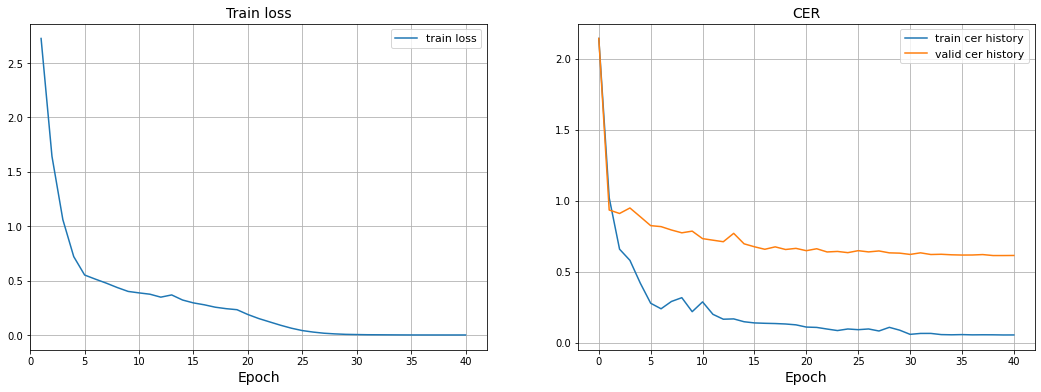

<Figure size 432x288 with 0 Axes>

In [5]:
#!g1.1
%run train.py --config_path "{CONFIG_PATH}"

### Тестирование модели

In [ ]:
import cv2
import random

from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

from utils.predictor import OcrPredictor
from utils.config import Config

In [ ]:
config = Config(CONFIG_PATH)
models_directory = config.get("save_dir")
images_directory = "../data/Peter's_notes/train/images"

models_directory # = '../data/experiments/test'

In [ ]:
images = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]
models = [f for f in listdir(models_directory) if isfile(join(models_directory, f))]

In [ ]:
models = list(filter(lambda model_name: model_name[6:model_name.find('-', 6)].isdigit(), models))
models = sorted(models, key=lambda model_name: int(model_name[6:model_name.find('-', 6)]), reverse=True)
model_path = join(models_directory, models[0])
model_path # = "../data/experiments/handwritten_names/tiny-ViTSTR.ckpt"

In [ ]:
image_path = join(images_directory, random.choice(images))
image_path

In [ ]:
#!g1.1
predictor = OcrPredictor(
    model_path=model_path,
    config_path=CONFIG_PATH,
    device=DEVICE
)

In [ ]:
img = cv2.imread(image_path)

In [ ]:
#!g1.1
pred_data = predictor(img)

In [ ]:
print("Prediction: " + pred_data)

plt.figure(figsize=(5, 5))
plt.imshow(img)